In [2]:
# This jupyter notebook has been created for convolutional layer demo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [56]:
img_one = Image.open('imgs\\leopard.jpg')
img_one.show()
original_hist = img_one.histogram()

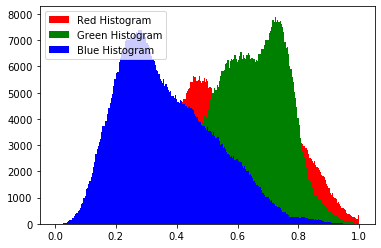

In [57]:
original_matrix = np.asarray(img_one)
original_red = original_matrix[ : , : , 0]
original_green = original_matrix[ : , : , 1]
original_blue = original_matrix[ : , : , 2]
plt.hist(original_red.ravel() / 255.0, bins = 256, range = (0.0, 1.0), color = 'r', label = 'Red Histogram')
plt.hist(original_green.ravel() / 255.0, bins = 256, range = (0.0, 1.0), color = 'g', label = 'Green Histogram')
plt.hist(original_blue.ravel() / 255.0, bins = 256, range = (0.0, 1.0), color = 'b', label = 'Blue Histogram')
plt.legend(loc = 'best')
plt.show()

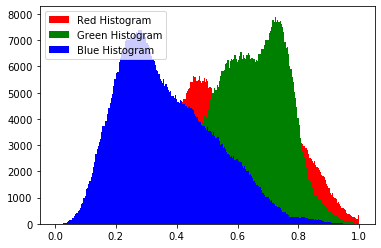

In [58]:
degree = 180
rotated_img_one = img_one.rotate(angle = degree)
rotated_img_one.show()
rotated_matrix = np.asarray(rotated_img_one)
rotated_red = rotated_matrix[ : , : , 0]
rotated_green = rotated_matrix[ : , : , 1]
rotated_blue = rotated_matrix[ : , : , 2]
plt.hist(rotated_red.ravel() / 255.0, bins = 256, range = (0.0, 1.0), color = 'r', label = 'Red Histogram')
plt.hist(rotated_green.ravel() / 255.0, bins = 256, range = (0.0, 1.0), color = 'g', label = 'Green Histogram')
plt.hist(rotated_blue.ravel() / 255.0, bins = 256, range = (0.0, 1.0), color = 'b', label = 'Blue Histogram')
plt.legend(loc = 'best')
plt.show()

In [49]:
def conv(img, im_filter):
    """
    This conv function implys a simple convolution filter
    
    Parameters:
    img: RGB image as a 3-d numpy array
    im_filter: 2-d numpy array, a square matrix
    """
    # Imput image dimensions in 2D
    height = img.shape[0]
    width = img.shape[1]
    
    # Iterate over all layers 
    layer_number = img.shape[2]
    
    # List stores filtered img
    pic_list = np.zeros((height - len(im_filter) + 1, width - len(im_filter) + 1, layer_number))
    
    for layer in range(layer_number):
        curr_layer = img[ : , : , layer]
        print(curr_layer.shape)
        # Output image with reduced dimensions
        out_img = np.zeros((height - len(im_filter) + 1, width - len(im_filter) + 1))
        
        for row in range(len(out_img)):
            for col in range(len(out_img[0])):
                
                # Implementing the filter 
                # i, j indicate the coordinates inside the kernel
                for i in range(len(im_filter)):
                    for j in range(len(im_filter[0])):
                        out_val = out_img[row, col]
                        #print(f'output image value is {out_val}')
                        img_val = curr_layer[row + i, col + j]
                        #print(f'original image value is {img_val}')
                        filter = im_filter[i, j]
                        #print(f'filter value is {filter}')
                        filtered_val = out_val + img_val * filter
                        #print(f'processed value is {filtered_val}')
                        out_img[row, col] = filtered_val
        pic_list[ : , : , layer] = out_img
    
    # Merging the filtered layers into a new image
    new_img = Image.fromarray(pic_list.astype(np.uint8))
    new_img.show()
    return new_img

(681, 968)
(681, 968)
(681, 968)


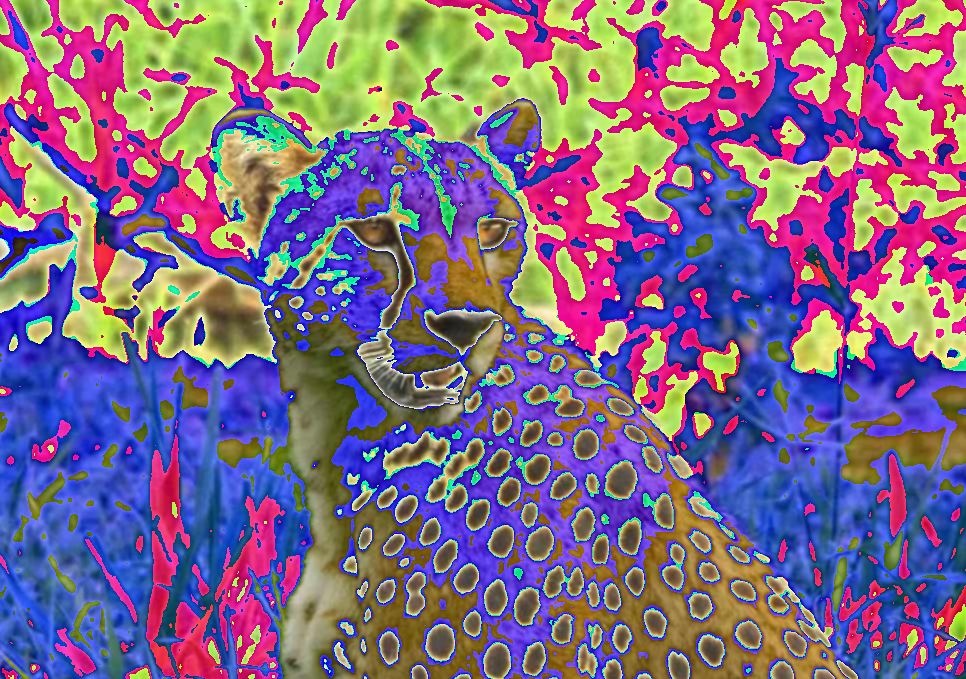

In [59]:
blur_filter = np.full([3, 3], 1. / 5)
conv(original_matrix, blur_filter)

In [46]:
sobel_y = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_x = sobel_y.T

In [60]:
sob_x = conv(original_matrix, sobel_x)

(681, 968)
(681, 968)
(681, 968)


In [61]:
sob_y = conv(original_matrix, sobel_y)

(681, 968)
(681, 968)
(681, 968)


In [62]:
sob = conv(np.asarray(sob_x), sobel_y)

(679, 966)
(679, 966)
(679, 966)


(681, 968)
(681, 968)
(681, 968)


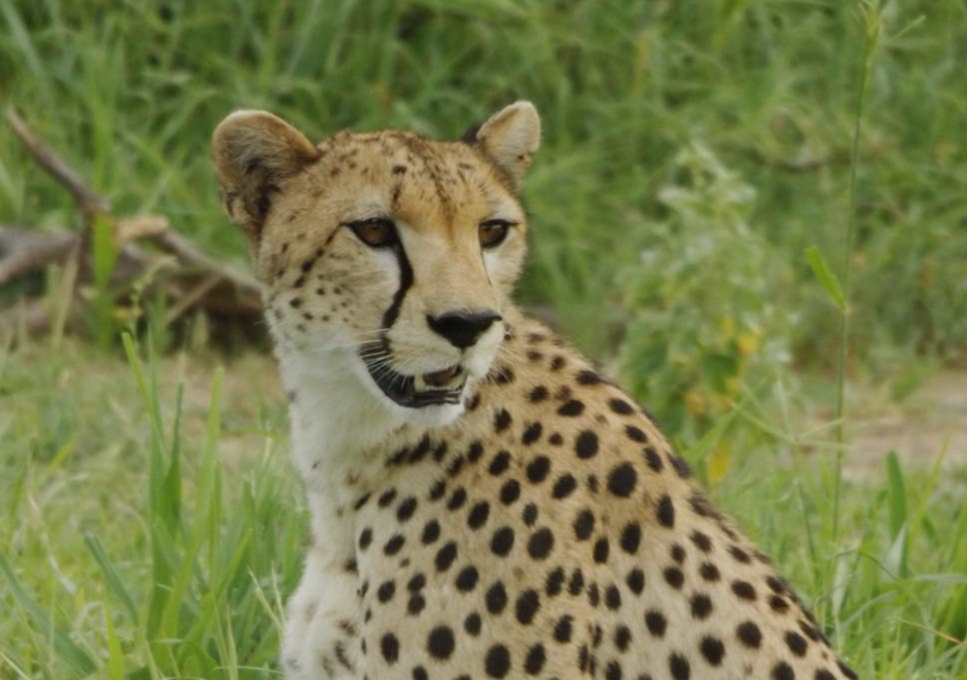

In [63]:
blur_filter_new = np.full([2, 2], 1. / 5)
conv(original_matrix, blur_filter_new)

(681, 968)
(681, 968)
(681, 968)


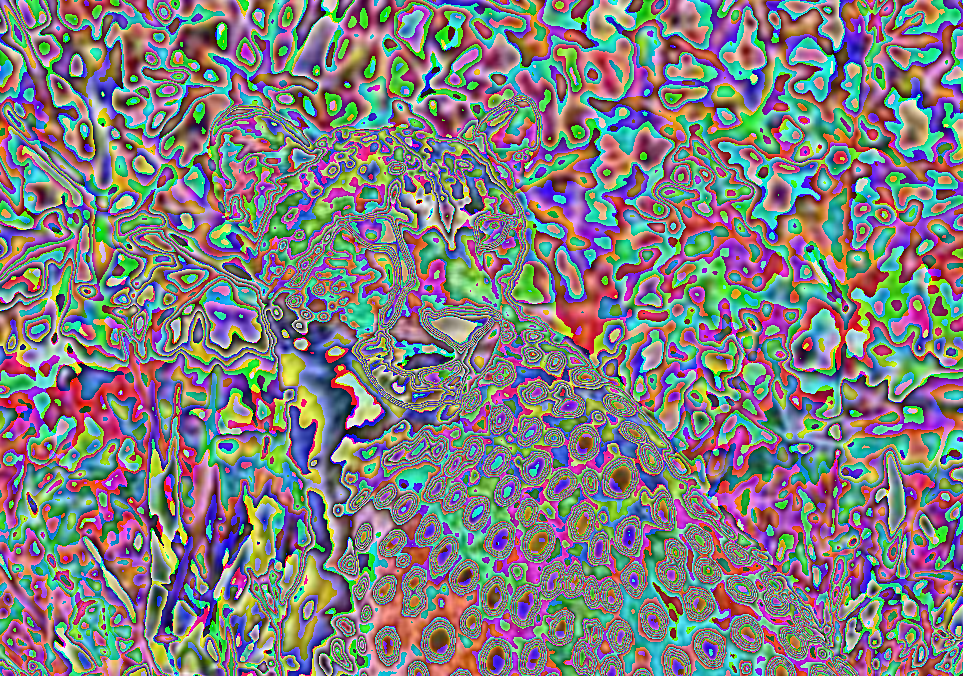

In [64]:
blur_filter_largest = np.full([6, 6], 1. / 5)
conv(original_matrix, blur_filter_largest)